In [139]:
import pylab as pl
import scipy as sp
import numpy as np
from scipy.io import loadmat
import pdb

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
def load_data(fname):
    # load the data
    data = loadmat(fname)
    # extract images and labels
    imgs = data['data_patterns']
    labels = data['data_labels']
    return imgs, labels

In [142]:
fname = "usps.mat"
imgs,labels = load_data(fname)
imgs,labels

(array([[-0.99999911, -0.99999982, -0.99810815, ..., -0.9999848 ,
         -0.99988925, -0.99999988],
        [-0.999928  , -0.99999666, -0.96389002, ..., -0.99854738,
         -0.99694294, -0.99999988],
        [-0.99788511, -0.99981362, -0.76736605, ..., -0.96670383,
         -0.96289396, -0.99999988],
        ...,
        [-0.99999714, -0.99979782, -0.91768515, ..., -0.99999988,
         -0.99827731, -0.99999487],
        [-0.99999988, -0.99998116, -0.98832631, ..., -0.99999988,
         -0.99992406, -0.99999988],
        [-0.99999988, -0.99999893, -0.99942124, ..., -0.99999988,
         -0.99999785, -0.99999988]]),
 array([[-1, -1, -1, ..., -1,  1, -1],
        [-1, -1, -1, ..., -1, -1,  1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [ 1, -1, -1, ..., -1, -1, -1]], dtype=int16))

In [143]:
imgs.shape,labels.shape

((256, 2007), (10, 2007))

In [144]:
np.unique(labels[:,0], return_counts=True)

(array([-1,  1], dtype=int16), array([9, 1]))

In [146]:
def prediction(X, weights):
    pred = (X.T @ weights).T
    pred[pred>=0] = 1
    pred[pred<0] = -1
    return pred
    

In [210]:
def perceptron_train(X,Y,Xtest,Ytest,iterations=100,eta=0.1):
    
    # initialize accuracy vector
    acc = np.zeros(iterations)
    # initialize weight vector
    weights = np.random.random((X.shape[0]))
    # loop over iterations    
    for it in sp.arange(iterations):
    # find all indices of misclassified data
    
        pred = prediction(X, weights)
        idx = list((pred != Y))
        wrong = X.T[idx]
        
        # check if there really are misclassified data
        if wrong.shape[0] > 0:
            
            # pick a random misclassified data point
            rand_int = int(np.random.randint(wrong.shape[0]))
            rit = wrong[rand_int]
            weights += eta*rit*Y[idx][rand_int]/(it%20+1)
            
            # compute accuracy vector
            acc[it] = np.sum(prediction(Xtest,weights) == Ytest)/Ytest.shape[0]
    # return weight vector and accuracy
    return weights,acc


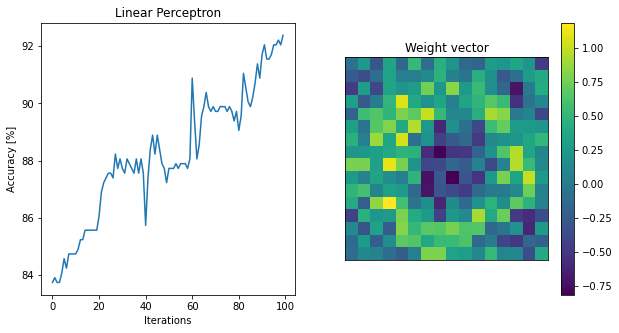

In [211]:
def digits(digit):
    fname = "usps.mat"
    imgs,labels = load_data(fname)
    # we only want to classify one digit 
    labels = sp.sign((labels[digit,:]>0)-.5)

    # please think about what the next lines do
    permidx = sp.random.permutation(sp.arange(imgs.shape[-1]))
    trainpercent = 70.
    stopat = sp.floor(labels.shape[-1]*trainpercent/100.)
    stopat= int(stopat)

    # cut segment data into train and test set into two non-overlapping sets:
    X = imgs[:, permidx[:stopat], ]
    Y = labels[permidx[:stopat]]
    Xtest = imgs[:, permidx[stopat:]]
    Ytest = labels[permidx[stopat:]]
    #check that shapes of X and Y make sense..
    # it might makes sense to print them
    
    w,acc_perceptron = perceptron_train(X,Y, Xtest,Ytest)

    fig = pl.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(acc_perceptron*100.)
    pl.xlabel('Iterations')
    pl.title('Linear Perceptron')
    pl.ylabel('Accuracy [%]')

    # and imshow the weight vector
    ax2 = fig.add_subplot(1,2,2)
    # reshape weight vector
    weights = sp.reshape(w,(int(sp.sqrt(imgs.shape[0])),int(sp.sqrt(imgs.shape[0]))))
    # plot the weight image
    imgh = ax2.imshow(weights)
    # with colorbar
    pl.colorbar(imgh)
    ax2.set_title('Weight vector')
    # remove axis ticks
    pl.xticks(())
    pl.yticks(())
    # remove axis ticks
    pl.xticks(())
    pl.yticks(())

    # write the picture to pdf
    fname = 'Perceptron_digits-%d.pdf'%digit
    pl.savefig(fname)


digits(0)